In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
import pickle as pkl
from catboost import Pool, CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
455,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
325,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [4]:
data.shape

(1025, 14)

In [5]:
y = data['target']
X = data.drop('target', axis = 1)

In [6]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [7]:
skf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

In [8]:
cat_score = []
for fold,(tr_in,te_in) in enumerate(skf.split(X, y)):
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    cat = CatBoostClassifier(n_estimators = 500, verbose = 0)
    cat.fit(X_train, y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 300, use_best_model = True)
    cat_score.append(f1_score(y_test, cat.predict(X_test)))
    print(f'fold {fold + 1}: {f1_score(y_test, cat.predict(X_test))}')

print('cat_score: ' + str(np.mean(cat_score)))

fold 1: 1.0
fold 2: 1.0
fold 3: 0.9855072463768115
fold 4: 1.0
fold 5: 1.0
cat_score: 0.9971014492753623


In [9]:
rf_score = []
for fold,(tr_in,te_in) in enumerate(skf.split(X_sc, y)):
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    rf = RandomForestClassifier(n_estimators = 500, verbose = 0, max_depth = 9)
    rf.fit(X_train, y_train)
    rf_score.append(f1_score(y_test, rf.predict(X_test)))
    print(f'fold {fold + 1}: {f1_score(y_test, rf.predict(X_test))}')

print('rf_score: ' + str(np.mean(rf_score)))

fold 1: 1.0
fold 2: 1.0
fold 3: 1.0
fold 4: 1.0
fold 5: 1.0
rf_score: 1.0


In [10]:
lgb_score = []
for fold,(tr_in,te_in) in enumerate(skf.split(X, y)):
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    lgb = LGBMClassifier(n_estimators = 500, verbose = 0)
    lgb.fit(X_train, y_train)
    lgb_score.append(f1_score(y_test, lgb.predict(X_test)))
    print(f'fold {fold + 1}: {f1_score(y_test, lgb.predict(X_test))}')

print('lgb_score: ' + str(np.mean(lgb_score)))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [11]:
classifier_score = []
for fold,(tr_in,te_in) in enumerate(skf.split(X, y)):
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    classifier = StackingClassifier(estimators = [('cat', cat), ('lgb', lgb), ('rf', rf)], final_estimator = lgb)
    classifier.fit(X_train, y_train)
    classifier_score.append(f1_score(y_test, classifier.predict(X_test)))
    print(f'fold {fold + 1}: {f1_score(y_test, classifier.predict(X_test))}')

print('classifier_score: ' + str(np.mean(classifier_score)))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

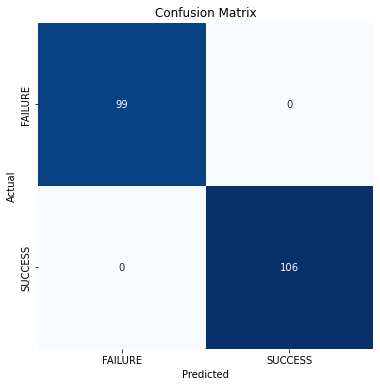


		Classification Report:
	--------------------------------------
               precision    recall  f1-score   support

     FAILURE       1.00      1.00      1.00        99
     SUCCESS       1.00      1.00      1.00       106

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [12]:
y_pred = np.array(classifier.predict(X_test), dtype = np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names = ['FAILURE', 'SUCCESS'])

plt.figure(figsize= (6,6))
sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cmap = 'Blues', cbar = False)
plt.xticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.yticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('\n\t\tClassification Report:\n\t--------------------------------------\n', clr)

In [13]:
pkl_out = open('Heart_Classfier.pkl', 'wb')
pkl.dump(classifier, pkl_out)
pkl_out.close

<function BufferedWriter.close>

In [16]:
pkl_in = open('Heart_Classfier.pkl', 'rb')
clf = pkl.load(pkl_in)

In [17]:
clf.predict([[88, 1,  2, 10, 50, 0, 1, 10, 1, 3.1, 2, 2, 3]])

array([0], dtype=int64)

In [18]:
# plt.figure(figsize = (20, 7))
# sns.countplot(data.slope, hue = data.target)

In [19]:
# !git clone https://github.com/krishnaik06/Heroku-Demo

In [20]:
%%writefile requirements.txt

Flask==1.1.1
gunicorn==19.9.0
itsdangerous==1.1.0
Jinja2==2.10.1
MarkupSafe==1.1.1
Werkzeug==0.15.5
numpy>=1.9.2
scipy>=0.15.1
scikit-learn>=0.18
matplotlib>=1.4.3
pandas>=0.19

Overwriting requirements.txt


In [22]:
# !pip install -r requirements.txt --user

In [18]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [11]:
# with open('requirements.txt', 'r') as f:
#     print(f.read())

In [12]:
# pip list requirements.txt